In [1]:
import pandas as pd
titanic = pd.read_csv('C:/Users/S451/Desktop/nlp/25.02_ml/titanic.csv', index_col='PassengerId')

# 1 задание

In [2]:
import numpy as np

df = titanic[['Sex', 'Survived']]
female = df[df['Sex'] == 'female']
male = df[df['Sex'] == 'male']

fem_s = sum(i for i in female['Survived'] if i == 1)
fem_not_s = len(female) - fem_s
fem_data = [fem_s, fem_not_s]

m_s = sum(i for i in male['Survived'] if i == 1)
m_not_s = len(male) - m_s
m_data = [m_s, m_not_s]

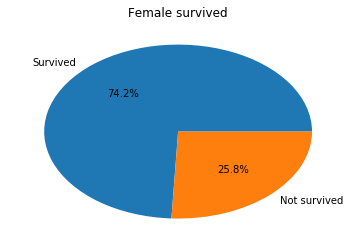

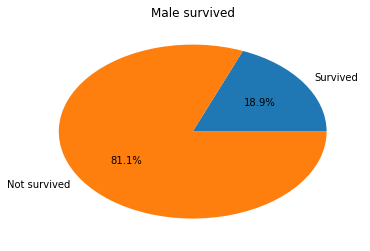

In [3]:
import matplotlib.pyplot as plt

labels = ['Survived', 'Not survived']

plt.pie(fem_data, labels=labels, autopct='%1.1f%%')
plt.title('Female survived')
plt.show()

plt.pie(m_data, labels=labels, autopct='%1.1f%%')
plt.title('Male survived')
plt.show()

Из полученных диаграмм видно, что вероятность выжить у женщин выше и составляет 74.2%
Вероятность выжить для мужчин: 18.9%

In [4]:
df = titanic[['Pclass', 'Survived']]


Pclass1 = df[df['Pclass'] == 1]
Pclass2 = df[df['Pclass'] == 2]
Pclass3 = df[df['Pclass'] == 3]

Pclass1_s = sum(i for i in Pclass1['Survived'] if i == 1)
Pclass1_not_s = len(Pclass1) - Pclass1_s
Pclass1_data = [Pclass1_s, Pclass1_not_s]

Pclass2_s = sum(i for i in Pclass2['Survived'] if i == 1)
Pclass2_not_s = len(Pclass2) - Pclass2_s
Pclass2_data = [Pclass2_s, Pclass2_not_s]

Pclass3_s = sum(i for i in Pclass3['Survived'] if i == 1)
Pclass3_not_s = len(Pclass3) - Pclass3_s
Pclass3_data = [Pclass3_s, Pclass3_not_s]

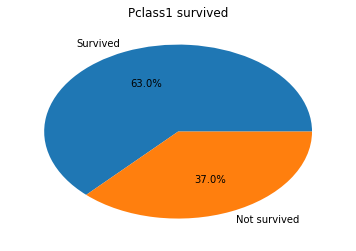

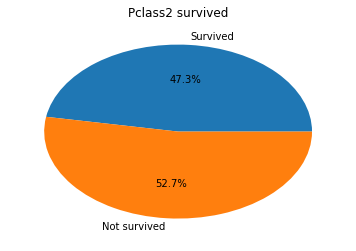

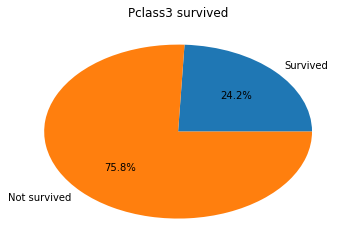

In [5]:
labels = ['Survived', 'Not survived']

plt.pie(Pclass1_data, labels=labels, autopct='%1.1f%%')
plt.title('Pclass1 survived')
plt.show()

plt.pie(Pclass2_data, labels=labels, autopct='%1.1f%%')
plt.title('Pclass2 survived')
plt.show()

plt.pie(Pclass3_data, labels=labels, autopct='%1.1f%%')
plt.title('Pclass3 survived')
plt.show()

Диаграммы показывают, что чем выше социально-материальное положение человека, тем больше шанс выжить. 63% пассажиров первого класса выжили, в то время, как у 2го и 3го класса эти показатели составили 47.3% и 24.2% соответственно.

In [6]:
df = titanic[['Pclass', 'Fare']]

Pclass1 = df[df['Pclass'] == 1]
Pclass2 = df[df['Pclass'] == 2]
Pclass3 = df[df['Pclass'] == 3]

p1_fare = np.mean(np.array(Pclass1['Fare']).astype(np.float))
p2_fare = np.mean(np.array(Pclass2['Fare']).astype(np.float))
p3_fare = np.mean(np.array(Pclass3['Fare']).astype(np.float))

fare_data = [p1_fare, p2_fare, p3_fare]

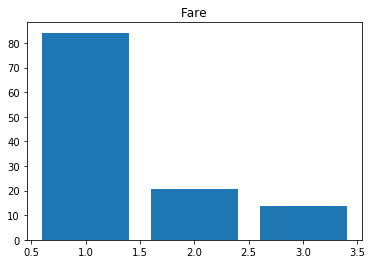

In [7]:
fig = plt.figure()
plt.bar([1, 2, 3], fare_data)
plt.title('Fare')
plt.show()

Стоимость билета в первый класс значительно выше, чем стоимость других билетов. 1й класс больше 80, 2й и 3й - около 20 и 10 соответственно.

# 2 задание

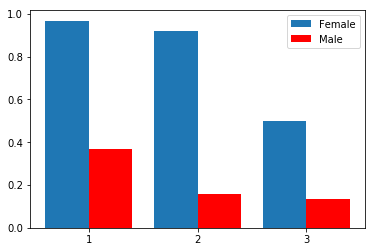

In [8]:
df = titanic[['Survived', 'Sex', 'Pclass']]

female_df = df[df['Sex'] == 'female']
male_df = df[df['Sex'] == 'male']

def chance_count(data, pclass):
    data = data[data['Pclass'] == pclass]
    return np.mean(np.array(data['Survived']).astype(np.float))

fem_result = [chance_count(female_df, i) for i in range(1, 4)]
m_result = [chance_count(male_df, i) for i in range(1, 4)]

fig, ax = plt.subplots()
locs = np.arange(1, len(fem_result)+1)
width = 0.4
fb = plt.bar(locs + width, fem_result, width=width)
mb = plt.bar(locs + width*2, m_result, width=width, color='red')
plt.xticks(locs + width*1.5, locs)
ax.legend((fb[0], mb[0]), ('Female', 'Male'))
plt.show()

Из графика видно, что вероятность выжить высока у женщин 1го и 2го классов. Вероятность выжить для женщина 3го класса примерно равна 50%. Вероятность выжить для мужчины в любом слуае ниже 40%.

# 3 задание

In [9]:
df = titanic[['Pclass', 'Fare', 'Age', 'Sex', 'SibSp', 'Parch', 'Survived']]
df = df.dropna()

x_labels = ['Pclass', 'Fare', 'Age', 'Sex', 'SibSp', 'Parch']
X, y = df[x_labels], df['Survived']
X['Sex'] = X['Sex'].map({'female': 0, 'male':1}).astype(int)

C:\Users\S451\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# 4 задание

In [10]:
from sklearn import cross_validation
from sklearn.model_selection import train_test_split, KFold, cross_val_score

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)

C:\Users\S451\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score

scores = []
for i in range(2, 10):
    clf = DecisionTreeClassifier(min_samples_split = i)
    clf.fit(np.array(X_train), np.array(y_train))
    y_pred = clf.predict(X_test)
    scores.append(f1_score(y_test, y_pred))

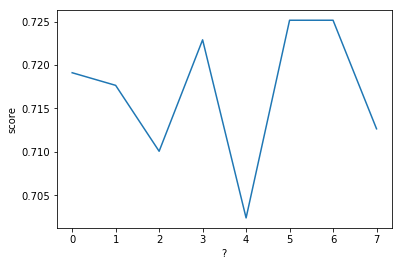

In [13]:
plt.plot(scores)
plt.xlabel('?')
plt.ylabel('score')
plt.show()

In [2]:
from IPython.display import Image
from sklearn import tree
import pydotplus

clf = DecisionTreeClassifier(min_samples_split = 6)
clf.fit(np.array(X_train), np.array(y_train))
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = x_labels, 
                                class_names=['Survived', 'Not survived'], 
                                filled = True, rounded = True, special_characters = True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

Модуль установлен, но работать не хочет 